# Read True and Fake CSV

In [1]:
import numpy as np
import pandas as pd

In [2]:
true_df = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')
true_df.head()  # 21417 rows × 4 columns

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake_df = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')
fake_df.head()  # 23481 rows × 4 columns

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Add Label Column and create concat dataframe

In [4]:
## Assign labels for the news type
true_df['news_type'] = 1 
fake_df['news_type'] = 0

In [5]:
## concate both dataframes
news_df = pd.concat([true_df,fake_df],ignore_index=True)
news_df = news_df.sample(frac=1).reset_index(drop=True)
train_df = news_df # for future use
train_df.head()  # 44898 rows × 5 columns

,title,text,subject,date,news_type
0,WOW! HILLARY SUPPORTER CAUGHT On Undercover Ca...,Democrats are on the move. They are panicking ...,politics,"Oct 12, 2016",0
1,Chaotic scenes as suspects wheeled around airp...,"KUALA LUMPUR (Reuters) - Handcuffed, wearing b...",worldnews,"October 24, 2017",1
2,OBAMA’S ILLEGALS TO GET RETRO TAX CREDITS FOR ...,No need to file rules don t apply to Obama s a...,left-news,"Jun 4, 2015",0
3,EU states see Britain failing to meet Brexit d...,BRUSSELS (Reuters) - EU envoys discussed on We...,worldnews,"November 8, 2017",1
4,U.S. lawmakers seek more visas for Afghans who...,WASHINGTON (Reuters) - A group of Republican a...,politicsNews,"March 15, 2017",1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

final_labels = np.array(news_df['news_type'])

# Preprocess Text

In [7]:
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
news_df.iloc[0]['text']

'Democrats are on the move. They are panicking over the size of Trump s rallies vs. Hillary s. They will do whatever is necessary to hold on to power. Americans need to vigilant. We all need to get involved in working to help out with voter registration and to keep an eye on the process. We all need to get involved with the GOP and become poll challengers on election day in precincts, and to help to count absentee ballots. We cannot trust that if we leave this election up to the people who have traditionally been allowed to count our votes or supervise our elections, that we will have a fair result on November 8th. Watch this stunning undercover video taken by James O Keefe s group Project Veritas of one of Hillary s operatives breaking the law, when he suggests it s okay to take away a newly registered voter s right to vote:'

In [9]:
## Preprocess the Text

wordnet_lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # lower
    tokens = [w.lower() for w in tokens]
    
    # stemming
    stem_ls = [PorterStemmer().stem(w) for w in tokens]
    
    # lemmatization
    lemma_ls = [wordnet_lemma.lemmatize(w) for w in stem_ls]
    
    # remove punctuation
    stripped_ls = [w for w in lemma_ls if not w in string.punctuation]

    # remove tokens that are not alphabetic or numeric
    words = [word for word in stripped_ls if word.isalpha() or word.isnumeric()]
    
    # removing stopwords
    words = [w for w in words if not w in stop_words]
    
    return ' '.join(words)

preprocess_text(news_df.iloc[0]['text'])

'democrat move panick size trump ralli hillari whatev necessari hold power american need vigil need get involv work help voter registr keep eye process need get involv gop becom poll challeng elect day precinct help count absente ballot trust leav thi elect peopl tradit allow count vote supervis elect fair result novemb watch thi stun undercov video taken jame keef group project verita one hillari oper break law suggest okay take away newli regist voter right vote'

In [10]:
%%time
news_df['text'] = news_df['text'].apply(preprocess_text)

CPU times: user 14min 2s, sys: 936 ms, total: 14min 3s
Wall time: 14min 6s


In [11]:
news_df.head()

,title,text,subject,date,news_type
0,WOW! HILLARY SUPPORTER CAUGHT On Undercover Ca...,democrat move panick size trump ralli hillari ...,politics,"Oct 12, 2016",0
1,Chaotic scenes as suspects wheeled around airp...,kuala lumpur reuter handcuf wear bulletproof v...,worldnews,"October 24, 2017",1
2,OBAMA’S ILLEGALS TO GET RETRO TAX CREDITS FOR ...,need file rule appli obama amnesti illeg illeg...,left-news,"Jun 4, 2015",0
3,EU states see Britain failing to meet Brexit d...,brussel reuter eu envoy discus wednesday delay...,worldnews,"November 8, 2017",1
4,U.S. lawmakers seek more visas for Afghans who...,washington reuter group republican democrat se...,politicsNews,"March 15, 2017",1


## WORDCLOUD for True News

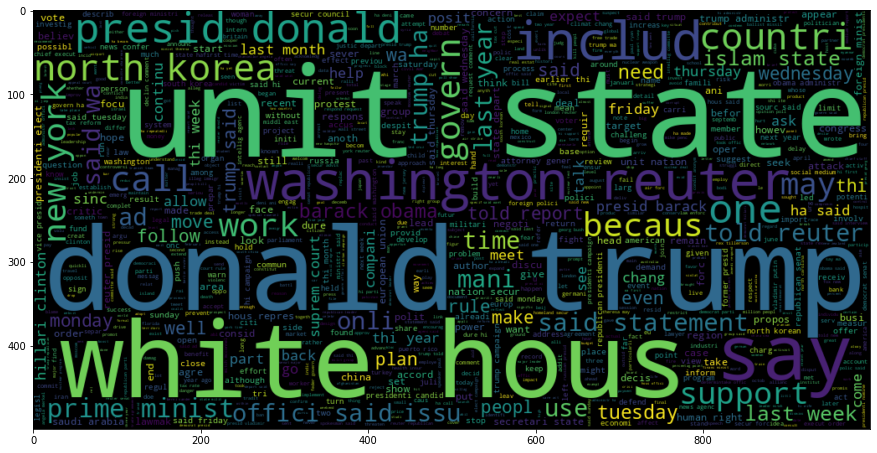

In [12]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,15))

wc_true = WordCloud(max_words = 2000, width=1000, height=500, stopwords= STOPWORDS).generate(' '.join(news_df[news_df['news_type']==1].text))
plt.imshow(wc_true, interpolation = 'bilinear')

## WORDCLOUD for Fake News

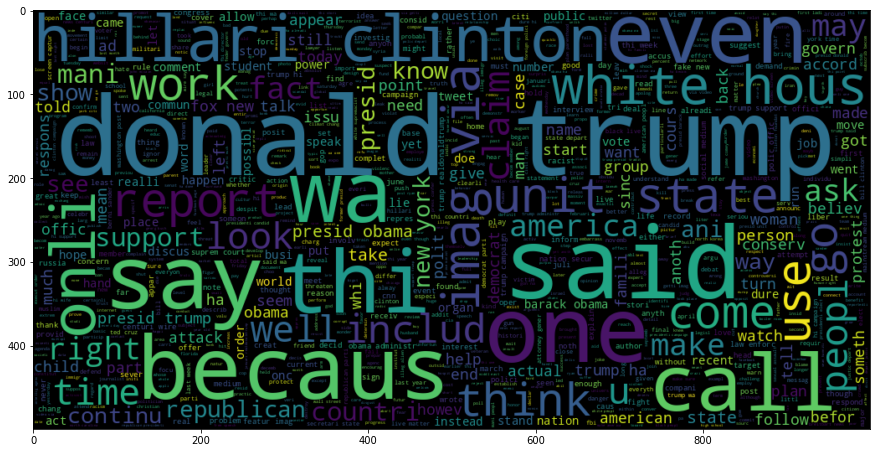

In [13]:
plt.figure(figsize=(15,15))

wc_fake = WordCloud(max_words = 2000, width=1000, height=500, stopwords= STOPWORDS).generate(' '.join(news_df[news_df['news_type']==0].text))
plt.imshow(wc_fake, interpolation = 'bilinear')

# Case 1 : Encoding words to numbers using Bag of Words with sklearn:SVM and sklearn:RandomForest Classifier

### Bag Of Words

In [14]:
%%time
from sklearn.feature_extraction.text import CountVectorizer

vectorize = CountVectorizer(max_features=200,ngram_range=(1,3))
data_1 = vectorize.fit_transform(news_df['text']).toarray()

print("Data Case 1 : \n",data_1)
print("Data Case 1 Shape : \n",data_1.shape)

print("Label : \n",final_labels)
print("Label Shape : \n",final_labels.shape)

Data Case 1 : 
 [[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 4 8 0]
 ...
 [0 2 0 ... 4 1 0]
 [0 0 0 ... 3 1 0]
 [0 0 0 ... 2 0 0]]
Data Case 1 Shape : 
 (44898, 200)
Label : 
 [0 1 0 ... 0 0 0]
Label Shape : 
 (44898,)
CPU times: user 1min 28s, sys: 2.66 s, total: 1min 30s
Wall time: 1min 30s


In [15]:
x_train, x_test, y_train, y_test = train_test_split(data_1,final_labels,test_size=0.2,random_state=777)

### sklearn : SVM Classifier

In [16]:
%%time
from sklearn.svm import LinearSVC

print("\nSVM Classifier : \n")
model_svc = LinearSVC().fit(x_train, y_train)
y_pred = model_svc.predict(x_test)

print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\n\nClassification Report : \n", classification_report(y_test,y_pred))
print("\n\nAccuracy : ",model_svc.score(x_test,y_test))


SVM Classifier : 

Confusion Matrix : 
 [[4682   35]
 [  31 4232]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4717
           1       0.99      0.99      0.99      4263

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Accuracy :  0.9926503340757238
CPU times: user 3.05 s, sys: 54 ms, total: 3.1 s
Wall time: 3.06 s


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### sklearn : RandomForest Classifier

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=300,random_state=40).fit(x_train, y_train)
y_pred = model_rfc.predict(x_test)

print("\nRandomForestClassifier : \n")
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
print("\nAccuracy : ",model_rfc.score(x_test,y_test))


RandomForestClassifier : 

Confusion Matrix : 
 [[4706   11]
 [  13 4250]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4717
           1       1.00      1.00      1.00      4263

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Accuracy :  0.9973273942093541
CPU times: user 18.6 s, sys: 53.9 ms, total: 18.7 s
Wall time: 18.8 s


# Case 2 : TF-IDF with XGBoost and LightGBM Classifier

### TF-TDF 

In [18]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, stop_words='english')
data_2 = tfidf.fit_transform(news_df['text'])

print("Data Case 2 : \n",data_2)
print("Data Case 2 Shape : \n",data_2.shape)

print("Label : \n",final_labels)
print("Label Shape : \n",final_labels.shape)

Data Case 2 : 
   (0, 57476)	0.06367710679048018
  (0, 56428)	0.12976537042771757
  (0, 47256)	0.14278511348171505
  (0, 6328)	0.08987277771008609
  (0, 49235)	0.1420164774958568
  (0, 65529)	0.09266170341754817
  (0, 38554)	0.07119751360398142
  (0, 10216)	0.10510521773746867
  (0, 49589)	0.0907012045066754
  (0, 72504)	0.1977676971014405
  (0, 54091)	0.1098092904255965
  (0, 27764)	0.06800795397732401
  (0, 35957)	0.2057766010925872
  (0, 33737)	0.10813270860539134
  (0, 66505)	0.09249899068808792
  (0, 72683)	0.08269438323674039
  (0, 70932)	0.17105085693012423
  (0, 65288)	0.14164019153059712
  (0, 73658)	0.08586057478540225
  (0, 48392)	0.09938071481566095
  (0, 57046)	0.0920764654061161
  (0, 22879)	0.11872651658986584
  (0, 65787)	0.16357233302169166
  (0, 73129)	0.14337003459005507
  (0, 3776)	0.07831574082129392
  :	:
  (44897, 9652)	0.09068911426350458
  (44897, 39471)	0.02061505835262331
  (44897, 48303)	0.03637883821387386
  (44897, 5700)	0.025863569864661245
  (44897, 3974

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data_1,final_labels,test_size=0.2,random_state=777)

### XGBoost Classifier

In [20]:
%%time
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model_xgb = XGBClassifier(eval_metric='rmse', use_label_encode=False).fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)

print("\nXGBoost Classifier : \n")
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
print("\nAccuracy : ",accuracy_score(y_pred,y_test))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:48] WARNING: ../src/learner.cc:576: 
Parameters: { "use_label_encode" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



XGBoost Classifier : 

Confusion Matrix : 
 [[4708    9]
 [  15 4248]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4717
           1       1.00      1.00      1.00      4263

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Accuracy :  0.9973273942093541
CPU times: user 48.2 s, sys: 331 ms, total: 48.6 s
Wall time: 27.9 s


### LightGBM Classifier

In [21]:
%%time
from lightgbm import LGBMClassifier

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=777)

print("\nLightGBM Classifier : \n")
model_svc = LGBMClassifier(n_estimators = 300).fit(x_train, y_train, early_stopping_rounds=100, eval_metric='accuracy',eval_set=[(x_val,y_val)])
y_pred = model_svc.predict(x_test)

print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\n\nClassification Report : \n", classification_report(y_test,y_pred))
print("\n\nAccuracy : ",accuracy_score(y_pred,y_test))


LightGBM Classifier : 



/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.599339
[2]	valid_0's binary_logloss: 0.523383
[3]	valid_0's binary_logloss: 0.460239
[4]	valid_0's binary_logloss: 0.406816
[5]	valid_0's binary_logloss: 0.36134
[6]	valid_0's binary_logloss: 0.32214
[7]	valid_0's binary_logloss: 0.288224
[8]	valid_0's binary_logloss: 0.258613
[9]	valid_0's binary_logloss: 0.232777
[10]	valid_0's binary_logloss: 0.209944
[11]	valid_0's binary_logloss: 0.189836
[12]	valid_0's binary_logloss: 0.171975
[13]	valid_0's binary_logloss: 0.156116
[14]	valid_0's binary_logloss: 0.142001
[15]	valid_0's binary_logloss: 0.129321
[16]	valid_0's binary_logloss: 0.118113
[17]	valid_0's binary_logloss: 0.108125
[18]	valid_0's binary_logloss: 0.099189
[19]	valid_0's binary_logloss: 0.0912426
[20]	valid_0's binary_logloss: 0.0840868
[21]	valid_0's binary_logloss: 0.0777247
[22]	valid_0's binary_logloss: 0.0719633
[23]	valid_0's binary_logloss: 0.0668218
[24]	valid_0's binary_logloss: 0.0622315
[25]	valid_0's binary_logloss: 0.0581312
[26]

# Case 3 :  Pre-trained GloVe Embedding and Tensorflow LSTM

In [22]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

2022-01-27 11:47:20.845148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 11:47:20.846229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 11:47:20.846892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


### Tokenization, Padding

In [23]:
%%time
# Tokenization : Representing each word by a vector
from tensorflow.keras.preprocessing import text, sequence

max_features = 10000
maxlen = 300 # keep all text to 300, add padding for text len < 300 and truncating long ones

X = news_df['text'].values
tokenizer = text.Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
data_3 = sequence.pad_sequences(X,maxlen=maxlen)

print("Data Case 3 : \n",data_3)
print("Data Case 3 Shape : \n",data_3.shape)

print("Label : \n",final_labels)
print("Label Shape : \n",final_labels.shape)

Data Case 3 : 
 [[   0    0    0 ...  177   46   42]
 [ 960    6 9800 ... 2643   75  152]
 [   0    0    0 ...  108 1032   50]
 ...
 [1503    2  355 ... 1975  220  107]
 [   0    0    0 ...   89  121 1692]
 [   0    0    0 ...   89  121 3158]]
Data Case 3 Shape : 
 (44898, 300)
Label : 
 [0 1 0 ... 0 0 0]
Label Shape : 
 (44898,)
CPU times: user 14 s, sys: 180 ms, total: 14.2 s
Wall time: 14.4 s


### Introducing GloVe Embedding and creating Embedding Matrix

In [24]:
%%time

Embedding_file ='../input/glove-twitter/glove.twitter.27B.100d.txt'

def get_coeffs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embed_id = dict(get_coeffs(*o.rstrip().rsplit(' ')) for o in open(Embedding_file, encoding="utf8"))

embeds = np.stack(embed_id.values())
emb_mean, emb_std = embeds.mean(), embeds.std()
embeds_len = embeds.shape[1]

word_index = tokenizer.word_index # mapping of original word to number
nb_words = min(max_features, len(word_index))

embed_mat = np.random.normal(emb_mean, emb_std, (nb_words, embeds_len))
for word, i in word_index.items():
    if i >= max_features: continue
    embed_vec = embed_id.get(word)
    if embed_vec is not None: embed_mat[i] = embed_vec
        
print("Embedding Matrix : \n",embed_mat)
print("Embedding Matrix size : ",embed_mat.shape)

### Reference : https://www.kaggle.com/madz2000/nlp-using-glove-embeddings-99-87-accuracy --- to understand glove embedding

/opt/conda/lib/python3.7/site-packages/IPython/core/magic.py:187: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  call = lambda f, *a, **k: f(*a, **k)


Embedding Matrix : 
 [[ 0.64558176 -0.48577879 -1.45671453 ... -0.1697277   0.48918094
  -0.3790668 ]
 [ 0.64024001  0.77112001  0.32822999 ... -0.41058001  0.53272003
  -0.01706   ]
 [-0.24645001  0.45247999  0.83719999 ... -0.98967999 -0.25141001
  -0.54979002]
 ...
 [ 0.076874    1.06850004  0.53966999 ...  0.085434   -0.13275
   0.47841001]
 [ 0.26464    -0.27294001 -0.06849    ...  0.22326     0.44589001
   0.75727999]
 [-0.68528998  0.062692    1.51900005 ... -0.54635    -0.48359001
   0.088583  ]]
Embedding Matrix size :  (10000, 100)
CPU times: user 39.1 s, sys: 1.28 s, total: 40.4 s
Wall time: 41.1 s


### Build Model BiLSTM

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, Input, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Masking, Bidirectional, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

optimizer=optimizers.Adam(clipnorm=0.25,lr=0.0005)

def BiLSTM_Model():
    model = Sequential([
    Embedding(max_features, output_dim = embeds_len, weights = [embed_mat], input_length=maxlen, trainable=False),
    Bidirectional(LSTM(64,return_sequences=True,recurrent_regularizer=l2(2e-4))),
    Dropout(0.1),
    Bidirectional(LSTM(32,recurrent_regularizer=l2(2e-4),return_sequences=False)),
    Dense(16,activation='relu'),
    Dense(1,kernel_regularizer=l1_l2(1e-4, 2e-4),activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model


model_bilstm = BiLSTM_Model()
model_bilstm.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-01-27 11:48:17.355616: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-27 11:48:17.356893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 11:48:17.357784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 128)          84480     
_________________________________________________________________
dropout (Dropout)            (None, 300, 128)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,126,753
Trainable params: 126,753
Non-trainable params: 1,000,000
________________________________________

### Train Model

In [26]:
x_train,x_test,y_train,y_test = train_test_split(data_3,final_labels,test_size=0.2,random_state = 777)
epochs = 10
batch_size = 128

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state = 777)

history = model_bilstm.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_val,y_val) , epochs = epochs , callbacks = [early_stopping])

2022-01-27 11:48:22.220158: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-01-27 11:48:28.733077: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


225/225 [==============================] - 25s 77ms/step - loss: 0.3529 - accuracy: 0.8672 - val_loss: 0.1821 - val_accuracy: 0.9470
Epoch 2/10
225/225 [==============================] - 16s 71ms/step - loss: 0.1498 - accuracy: 0.9577 - val_loss: 0.1220 - val_accuracy: 0.9691
Epoch 3/10
225/225 [==============================] - 16s 73ms/step - loss: 0.1120 - accuracy: 0.9704 - val_loss: 0.1251 - val_accuracy: 0.9621
Epoch 4/10
225/225 [==============================] - 16s 72ms/step - loss: 0.0895 - accuracy: 0.9764 - val_loss: 0.0900 - val_accuracy: 0.9773
Epoch 5/10
225/225 [==============================] - 16s 72ms/step - loss: 0.0729 - accuracy: 0.9820 - val_loss: 0.0843 - val_accuracy: 0.9795
Epoch 6/10
225/225 [==============================] - 16s 72ms/step - loss: 0.0631 - accuracy: 0.9850 - val_loss: 0.0736 - val_accuracy: 0.9791
Epoch 7/10
225/225 [==============================] - 16s 72ms/step - loss: 0.0560 - accuracy: 0.9867 - val_loss: 0.0539 - val_accuracy: 0.9891
Epo

### Evaluate Model

In [27]:
loss,acc = model_bilstm.evaluate(x_test,y_test)

print("\n\nTest Data Loss : ",loss*100)
print("\nTest Data Accuracy : ",acc*100)

y_pred = (model_bilstm.predict(x_test) > 0.5).astype("int32")

print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))

281/281 [==============================] - 6s 21ms/step - loss: 0.0444 - accuracy: 0.9904


Test Data Loss :  4.444656148552895

Test Data Accuracy :  99.04231429100037

Confusion Matrix : 
 [[4683   34]
 [  52 4211]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4717
           1       0.99      0.99      0.99      4263

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Case 4 : BERT and RoBERTa

In [28]:
import torch

is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
print(device)

cuda


### Initialize Pretrained Models of BERT and RoBERTa

In [29]:
%%time
### Initialize Pretrained Models of BERT and RoBERTa

sentences = train_df['text'].values

from transformers import BertForSequenceClassification, BertTokenizer, RobertaForSequenceClassification, RobertaTokenizer, AdamW

model_bert = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2,output_attentions=False,output_hidden_states=False)
# 'bert-base-uncased' : 12 layer BERT model with uncased vocab
# num_labels : 2 labels for binary classification
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert.cuda()

print("\n\nBERT Model : \n\n",model_bert)

model_roberta = RobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=2,output_attentions=False,output_hidden_states=False)
# 'roberta-base' : 12 layer, 768 hidden, 12 heads, 125M params RoBERTa using BERT-base architecture
tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base')
model_roberta.cuda()

print("\n\nRoBERTa Model : \n\n",model_roberta)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]



BERT Model : 

 BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), 

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]



RoBERTa Model : 

 RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)


### Tokenization : encode_plus method from tokenizer_bert and tokenizer_roberta 

In [30]:
%%time
### Tokenization : encode_plus method from tokenizer_bert and tokenizer_roberta

# encode plus : tokenize sentence, prepand [CLS] to start, append [SEP] to end, 
# map token to their ID, Pad or truncate the sentence to max_len, create attention masks for [PAD] tokens

inputID_bert = []
attentionMask_bert = []

inputID_roberta = []
attentionMask_roberta = []

sentenceID = []
count = 0

for text in sentences:
    
    enc_dict_bert = tokenizer_bert.encode_plus(text,add_special_tokens=True,max_length=120,pad_to_max_length=True, return_attention_mask=True,return_tensors='pt')
    enc_dict_roberta = tokenizer_roberta.encode_plus(text,add_special_tokens=True,max_length=120,pad_to_max_length=True, return_attention_mask=True,return_tensors='pt')
    
    # max_length : Pad and truncate all texts
    # return_attention_mask : construct attention masks
    # return_tensors : 'pt' : pytorch tensor
    
    inputID_bert.append(enc_dict_bert['input_ids'])
    inputID_roberta.append(enc_dict_roberta['input_ids']) # added encoded text as ID to the list
    
    attentionMask_bert.append(enc_dict_bert['attention_mask']) # added attention mask to the list
    attentionMask_roberta.append(enc_dict_roberta['attention_mask']) # that simply differs padding from non-padding

    sentenceID.append(count)
    count = count + 1
    
# convert lists to tensor

inputID_bert = torch.cat(inputID_bert,dim=0)
inputID_roberta = torch.cat(inputID_roberta,dim=0)
attentionMask_bert = torch.cat(attentionMask_bert,dim=0)
attentionMask_roberta = torch.cat(attentionMask_roberta,dim=0)

labels = torch.tensor(final_labels)
sentenceID = torch.tensor(sentenceID)

print('\nOriginal: \n', sentences[0])
print('\nToken IDs BERT: \n', inputID_bert[0])
print('\nToken IDs RoBERTa: \n', inputID_roberta[0])

### Reference : https://www.kaggle.com/jaskaransingh/fake-news-classification-bert-roberta --- for tokenization

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t


Original: 
 democrat move panick size trump ralli hillari whatev necessari hold power american need vigil need get involv work help voter registr keep eye process need get involv gop becom poll challeng elect day precinct help count absente ballot trust leav thi elect peopl tradit allow count vote supervis elect fair result novemb watch thi stun undercov video taken jame keef group project verita one hillari oper break law suggest okay take away newli regist voter right vote

Token IDs BERT: 
 tensor([  101,  7672,  2693,  6634,  2243,  2946,  8398, 10958,  6894,  2940,
         8486,  2054,  6777, 26785,  7971,  8486,  2907,  2373,  2137,  2342,
         6819, 20142,  2342,  2131,  1999,  6767,  2140,  2615,  2147,  2393,
        14303, 20588, 16344,  2562,  3239,  2832,  2342,  2131,  1999,  6767,
         2140,  2615,  2175,  2361,  2022,  9006,  8554, 15775, 12179,  2290,
        11322,  2154, 18761,  2393,  4175,  9962,  2063, 10428,  3404, 12203,
         2615, 16215,  2072, 113

### Create DataSet and DataLoader

In [31]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Remove sentence id from TensorDataset after train validation test split
def sid_remove_from_tensordataset(datatensor): 
    
    inputID = []
    attentionMask = []
    label = []
    
    for sid,iid,amask,l in datatensor:
        inputID.append(iid.tolist())
        attentionMask.append(amask.tolist())
        label.append(l.tolist())
    
    inputID = torch.tensor(inputID)
    attentionMask = torch.tensor(attentionMask)
    label = torch.tensor(label)
    
    return TensorDataset(inputID,attentionMask,label)
    
# Get DataSetLoaders
def get_loaders(dataset,batch_size,b):

    """
    return the train, validation and test set loaders
    """  
    #dataset = torch.utils.data.TensorDataset(data_tr, labels_tr)
    train_size = int(0.8 * len(dataset))
    val_size = int(0.1 * len(dataset))
    test_size = len(dataset) - train_size - val_size
    #print("\nTrain DataSet Size :",train_size)
    #print("\nValidation DataSet Size :",val_size)
    #print("\nTest DataSet Size :",test_size)
    train_dataset, validation_dataset,test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])
    
    if(b==1): # sid remove only in BERT model : b=1
        train_dataset = sid_remove_from_tensordataset(train_dataset)
        validation_dataset = sid_remove_from_tensordataset(validation_dataset)
        test_dataset = sid_remove_from_tensordataset(test_dataset)

    train_loader = DataLoader(train_dataset, batch_size=batch_size,sampler=RandomSampler(train_dataset))
    valid_loader = DataLoader(validation_dataset, batch_size=batch_size,sampler=SequentialSampler(validation_dataset))    
    test_loader = DataLoader(test_dataset, batch_size=batch_size,sampler=SequentialSampler(test_dataset))

    return train_loader, valid_loader, test_loader


### Train and Evaluate Model

In [32]:
def get_accuracy(y_pred, y_test):
    y_pred_flat = np.argmax(y_pred, axis=1).flatten()
    y_test_flat = y_test.flatten()
    return np.sum(y_pred_flat == y_test_flat) / len(y_test_flat)

In [33]:
def train_model(model, optimizer, train_loader):
  
    model.train()

    epoch_loss = 0
    epoch_acc = 0

    for iid, amask, labels in train_loader:
        
        iid, amask, labels = iid.to(device), amask.to(device), labels.to(device)
        model.zero_grad()
        loss,outputs = model(iid,token_type_ids=None, attention_mask=amask,labels=labels, return_dict=False)  
        #torch.set_default_tensor_type(torch.FloatTensor)
        
        #x = torch.tensor(x, dtype=torch.float32)
        #labels=torch.tensor(labels, dtype= torch.float32)
        #loss = criterion(outputs, labels)
        #loss = criterion(outputs.squeeze(), labels.float32)
        epoch_loss += loss.item()
        loss.backward()
        #nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        
        epoch_acc += get_accuracy(outputs.detach().cpu().numpy(),labels.to('cpu').numpy())

    train_loss =  epoch_loss / len(train_loader)
    train_acc = epoch_acc / len(train_loader)  
    return train_loss, train_acc

In [34]:
def evaluate_model(model, loader):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    y_true=[]
    y_pred=[]
    
    with torch.no_grad():
    
        for iid, amask, labels in loader:
            iid, amask, labels = iid.to(device), amask.to(device), labels.to(device)

            loss,outputs = model(iid,token_type_ids=None, attention_mask=amask, labels=labels, return_dict=False)
            #torch.set_default_tensor_type(torch.FloatTensor)
            labels=torch.tensor(labels, dtype= torch.float32)
            
            #e_loss = criterion(outputs.squeeze(), labels.float32)
            #e_loss = criterion(outputs,labels)
            epoch_loss += loss.item()
            
            epoch_acc += get_accuracy(outputs.detach().cpu().numpy(),labels.to('cpu').numpy())
           
            y_true.append(labels.to('cpu').numpy())
            y_pred.append(outputs.detach().cpu().numpy())
            
        
    loss =  epoch_loss / len(loader)
    acc = epoch_acc / len(loader)  
    return loss, acc, y_pred, y_true

### Run Model

In [35]:
def run_model(model, train_loader, validate_loader, test_loader, epochs, batch_size, optimizer):
   
    for epoch in range(epochs):
        train_loss, train_acc = train_model(model, optimizer, train_loader)
        valid_loss, valid_acc, _, _ = evaluate_model(model, validate_loader)

        print(f'Epoch: {epoch+1:02}')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    ##Evaluate the test accuracy

    test_loss, test_acc, y_pred, y_true = evaluate_model(model, test_loader)
    print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')
    
    flat_pred = np.concatenate(y_pred,axis=0)
    flat_pred = np.argmax(flat_pred,axis=1).flatten()
    flat_true = np.concatenate(y_true, axis=0)
    print("\nConfusion Matrix : \n",confusion_matrix(flat_true,flat_pred))
    print("\nClassification Report : \n", classification_report(flat_true,flat_pred))
    
NUM_EPOCHS = 1
batch_size = 20

In [36]:
%%time

# RUN BERT Model
print("\n\nBERT Model :\n")
dataset_bert = TensorDataset(sentenceID, inputID_bert, attentionMask_bert, labels)
train_loader_bert, validation_loader_bert, test_loader_bert = get_loaders(dataset_bert, batch_size, 1)
optimizer_bert = AdamW(model_bert.parameters(),lr=5e-5,eps=1e-8)

run_model(model_bert, train_loader_bert, validation_loader_bert, test_loader_bert, NUM_EPOCHS, batch_size, optimizer_bert)



BERT Model :



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 01
	Train Loss: 0.030 | Train Acc: 99.28%
	 Val. Loss: 0.018 |  Val. Acc: 99.73%

Test Loss: 0.036 | Test Acc: 99.42%

Confusion Matrix : 
 [[2303   16]
 [  10 2162]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2319
         1.0       0.99      1.00      0.99      2172

    accuracy                           0.99      4491
   macro avg       0.99      0.99      0.99      4491
weighted avg       0.99      0.99      0.99      4491

CPU times: user 6min 55s, sys: 1min 39s, total: 8min 35s
Wall time: 8min 37s


In [37]:
%%time

# RUN RoBERTa Model
print("\n\nRoBERTa Model :\n")
dataset_roberta = TensorDataset(inputID_roberta, attentionMask_roberta, labels)
train_loader_roberta, validation_loader_roberta, test_loader_roberta = get_loaders(dataset_roberta, batch_size, 0)
optimizer_roberta = AdamW(model_roberta.parameters(),lr=5e-5,eps=1e-8)

run_model(model_roberta, train_loader_roberta, validation_loader_roberta, test_loader_roberta, NUM_EPOCHS, batch_size, optimizer_roberta)



RoBERTa Model :



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 01
	Train Loss: 0.036 | Train Acc: 99.17%
	 Val. Loss: 0.024 |  Val. Acc: 99.64%

Test Loss: 0.022 | Test Acc: 99.67%

Confusion Matrix : 
 [[2374   13]
 [   2 2102]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2387
         1.0       0.99      1.00      1.00      2104

    accuracy                           1.00      4491
   macro avg       1.00      1.00      1.00      4491
weighted avg       1.00      1.00      1.00      4491

CPU times: user 6min 58s, sys: 1min 40s, total: 8min 39s
Wall time: 8min 40s


# Summary

Case 1 : 
Bag of Words : Set of vectors containing count of word occurences, a simple and flexible approach in Text Classification.
Sklearn Library : SVM and RandomForest : Optimal Classifiers for Binary Classification.

Case 2 :
TF-IDF : It assigns a value to a term according to its importance in the text scaled by its importance across all the texts in the data. A popular approach in NLP.
XGBoost and LightGBM : Both are based on Gradient Boosted Decision Trees. In XGBoost, trees grow depth-wise and in LightGBM, trees grow leaf-wise. Both models had great success in enterprise applications and data science competitions. XGBoost is extremely powerful, though model training is faster in LightGBM.

Case 3 :
Pre-trained GloVe Embedding : GloVe = Global vectors for word representation. It is an unsupervised algorithm developed by Standford for generating word embeddings by aggregating global word-word co-occurence matrix from a corpus, which gives semantic relationships between words. Here, I have user Pretrained Word Vector of Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB) from https://nlp.stanford.edu/projects/glove/
Tensorflow Framework : Bi-Directional LSTM : LSTM is classic model used for NLP tasks

Case 4 :
PyTorch Framework : HuggingFace transformers Library
BERT : Google's BERT (October-2018) is the transformer based method for NLP, outperforming state-of-the-art on several tasks such as QnA, language inference. It is a pre-trained deep Bi-directional Encoder Representation from transformer with Masked Language Modelling (MLM) and Next Sentence Prediction (NSP).
RoBERTa : Facebook's RoBERTa (July-2019), robustly optimized BERT approach, advancing the state-of-the-art in self-supervised systems. It is a BERT without Next Sentence Prediction (NSP). To improve training procedure, RoBERTa removes the Next Sentence Prediction (NSP) task from BERT's pre-training and dynamic masking so that the masked token changes during training epochs.

The Most Preferred Model : From these 4 cases, currently the RoBERTa model is the most preferred one, as it is the optimized BERT approach.